Sending alert to emergency services for vehicle 4 at location [<POINT (37.752 -122.503)>]
Sending alert to emergency services for vehicle 4 at location [<POINT (37.757 -122.505)>]
Sending alert to emergency services for vehicle 4 at location [<POINT (37.755 -122.498)>]
Sending alert to emergency services for vehicle 4 at location [<POINT (37.754 -122.503)>]
Sending alert to emergency services for vehicle 4 at location [<POINT (37.756 -122.506)>]
Sending alert to emergency services for vehicle 4 at location [<POINT (37.757 -122.5)>]
Sending alert to emergency services for vehicle 4 at location [<POINT (37.753 -122.506)>]
Sending alert to emergency services for vehicle 4 at location [<POINT (37.756 -122.499)>]
Sending alert to emergency services for vehicle 4 at location [<POINT (37.753 -122.496)>]
Sending alert to emergency services for vehicle 4 at location [<POINT (37.753 -122.506)>]


<Figure size 1500x1000 with 0 Axes>

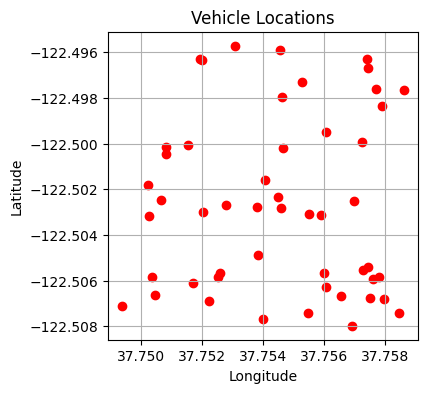

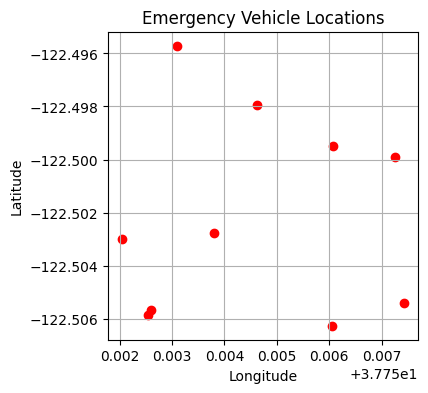

In [1]:
import time
import random
import matplotlib.pyplot as plt
import folium
import math
from folium.plugins import HeatMap
import numpy as np
from shapely.geometry import Polygon, Point

poly = Polygon([(37.75850848099701, -122.50833008408812), (37.75911919711413, -122.49648544907835),(37.751620611284935, -122.4937388670471),(37.74863453749236, -122.50742886185911)])

class Vehicle:
    def __init__(self, vehicle_id):
        self.vehicle_id = vehicle_id
        self.location = []
        self.accelerometer = random.randint(0, 100)
        self.gyroscope = random.randint(0, 100)
        self.emergency = False
        self.weather_condition = random.choice(["Clear", "Rain", "Snow", "Fog"])

    def update_location(self):
        min_x, min_y, max_x, max_y = poly.bounds
        points = []
        while len(points) < 1:
            random_point = Point([random.uniform(min_x, max_x), random.uniform(min_y, max_y)])
            if (random_point.within(poly)):
                points.append(random_point)
            self.location = points

    def detect_accident(self):
        if self.accelerometer > 80 or self.gyroscope > 80:
            self.emergency = True

class TrafficManagementSystem:
    def __init__(self):
        self.vehicles = {}

    def add_vehicle(self, vehicle):
        self.vehicles[vehicle.vehicle_id] = vehicle

    def remove_vehicle(self, vehicle_id):
        if vehicle_id in self.vehicles:
            del self.vehicles[vehicle_id]

    def send_alert(self, vehicle_id):
        if vehicle_id in self.vehicles and self.vehicles[vehicle_id].emergency:
            print(f"Sending alert to emergency services for vehicle {vehicle_id} at location {self.vehicles[vehicle_id].location}")
            self.vehicles[vehicle_id].emergency = False

# Create a traffic management system
tms = TrafficManagementSystem()

# Create and add vehicles to the system
for i in range(1, 6):
    vehicle = Vehicle(i)
    tms.add_vehicle(vehicle)

# Lists for storing data for visualization
vehicle_locations = []
emergency_locations = []
emergency_counts = []
accident_counts = []

# Simulate vehicles moving and detecting accidents
for _ in range(10):
    for vehicle_id in tms.vehicles.keys():
        vehicle = tms.vehicles[vehicle_id]
        vehicle.update_location()
        vehicle.detect_accident()
        if vehicle.emergency:
            tms.send_alert(vehicle_id)
            emergency_locations.extend([vehicle.location])
    
    vehicle_locations.extend([vehicle.location for vehicle in tms.vehicles.values()])
    emergency_counts.append(sum([1 for vehicle in tms.vehicles.values() if vehicle.emergency]))
    accident_counts.append([sum([1 for vehicle in tms.vehicles.values() if vehicle.emergency and vehicle.gyroscope > 80]),
                            sum([1 for vehicle in tms.vehicles.values() if vehicle.emergency and vehicle.accelerometer > 80])])
    time.sleep(1)

# Visualize the data
plt.figure(figsize=(15, 10))

vehicle_locations_flat = [point for sublist in vehicle_locations for point in sublist]
emergency_vehicle_locations_flat = [point for sublist in emergency_locations for point in sublist]

# Now you can extract the latitudes and longitudes
latitudes = [location.y for location in vehicle_locations_flat]
longitudes = [location.x for location in vehicle_locations_flat]

# Plotting
plt.figure(figsize=(4, 4))
plt.scatter(longitudes, latitudes, color='red')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Vehicle Locations')
plt.grid(True)
plt.show()

latitudes = [location.y for location in emergency_vehicle_locations_flat]
longitudes = [location.x for location in emergency_vehicle_locations_flat]

# Plot emergency locations
plt.figure(figsize=(4, 4))
plt.scatter(longitudes, latitudes, color='red')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Emergency Vehicle Locations')
plt.grid(True)
plt.show()

In [2]:
# Simulation

import folium
from folium import plugins
import random

# Road Condition Monitoring
def get_weather_data(location):
    weather_conditions = ["clear", "rain", "snow", "fog", "freezing rain", "sleet"]
    weather_condition = random.choice(weather_conditions)
    return weather_condition

def monitor_road_conditions(tms):
    for vehicle in tms.vehicles.values():
        location = (vehicle.location, vehicle.location)
        weather_condition = get_weather_data(location)
        if weather_condition in ["snow", "freezing rain", "sleet"]:
            print(f"Potential {weather_condition} road conditions at location {location}")

# Traffic Congestion Detection
def detect_traffic_congestion(tms):
    vehicle_locations = [vehicle.location for vehicle in tms.vehicles.values()]
    vehicle_speeds = [location.distance(prev_location) for location, prev_location in zip(vehicle_locations_flat[1:], vehicle_locations_flat)]
    if sum(vehicle_speeds) / len(vehicle_speeds) < 2:
        print("Traffic congestion detected")

# Interactive Map Visualization
def create_map(tms):
    map_data = [[location[0].y, location[0].x] for location in vehicle_locations]
    m = folium.Map(location=[50, 0], zoom_start=5)
    plugins.HeatMap(map_data).add_to(m)
    return m

# Road Condition Heatmap
def create_road_condition_heatmap(tms):
    map_data = []
    for vehicle in tms.vehicles.values():
        location = vehicle.location[0]  # Extract the Point object from the list
        weather_condition = get_weather_data(location)
        if weather_condition in ["snow", "freezing rain", "sleet"]:
            map_data.append([location.y, location.x, 1])
        else:
            map_data.append([location.y, location.x, 0])
    m = folium.Map(location=[50, 0], zoom_start=5)
    plugins.HeatMap(map_data).add_to(m)
    return m

# Simulation loop
for _ in range(10):
    for vehicle_id in tms.vehicles.keys():
        vehicle = tms.vehicles[vehicle_id]
        vehicle.update_location()
        vehicle.detect_accident()
        if vehicle.emergency:
            tms.send_alert(vehicle_id)

    monitor_road_conditions(tms)
    detect_traffic_congestion(tms)

    time.sleep(1)

# Visualizations
interactive_map = create_map(tms)
road_condition_heatmap = create_road_condition_heatmap(tms)
interactive_map.save("interactive_map.html")
road_condition_heatmap.save("road_condition_heatmap.html")

Sending alert to emergency services for vehicle 2 at location [<POINT (37.757 -122.507)>]
Sending alert to emergency services for vehicle 5 at location [<POINT (37.757 -122.507)>]
Traffic congestion detected
Sending alert to emergency services for vehicle 2 at location [<POINT (37.75 -122.499)>]
Sending alert to emergency services for vehicle 5 at location [<POINT (37.753 -122.499)>]
Potential sleet road conditions at location ([<POINT (37.751 -122.497)>], [<POINT (37.751 -122.497)>])
Traffic congestion detected
Sending alert to emergency services for vehicle 2 at location [<POINT (37.753 -122.507)>]
Sending alert to emergency services for vehicle 5 at location [<POINT (37.751 -122.5)>]
Potential snow road conditions at location ([<POINT (37.754 -122.502)>], [<POINT (37.754 -122.502)>])
Potential snow road conditions at location ([<POINT (37.753 -122.507)>], [<POINT (37.753 -122.507)>])
Potential snow road conditions at location ([<POINT (37.75 -122.505)>], [<POINT (37.75 -122.505)>])


In [3]:
import folium
from folium import plugins

def create_vehicle_density_map(tms):
    vehicle_locations = []
    for vehicle in tms.vehicles.values():
        # Ensure that vehicle.location returns a single Point object
        if isinstance(vehicle.location, list):
            # If vehicle.location is a list, assume it contains a single Point object
            point = vehicle.location[0]
        else:
            point = vehicle.location
        
        # Extract latitude and longitude from the Point object
        vehicle_locations.append((point.y, point.x))
    
    # Create the map and add HeatMap layer
    m = folium.Map(location=[50, 0], zoom_start=5)
    plugins.HeatMap(vehicle_locations).add_to(m)
    return m


In [4]:
import folium

def create_vehicle_trajectory_map(tms):
    m = folium.Map(location=[50, 0], zoom_start=5)
    for vehicle in tms.vehicles.values():
        # Assuming vehicle.location is a list containing a single Point object
        location = vehicle.location[0] if isinstance(vehicle.location, list) else vehicle.location
        
        # Extract latitude and longitude from the Point object
        lat, lon = location.y, location.x
        
        folium.PolyLine(
            locations=[(lat, lon)],  # Provide latitude and longitude as a tuple
            color="red",
            weight=2.5,
            opacity=1
        ).add_to(m)
    return m


In [5]:
import folium
from folium import plugins

def create_accident_hotspot_map(tms):
    accident_locations = [[vehicle.location, vehicle.location] for vehicle in tms.vehicles.values() if vehicle.emergency]
    m = folium.Map(location=[50, 0], zoom_start=5)
    plugins.HeatMap(accident_locations).add_to(m)
    return m

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def create_sensor_data_visualization(tms):
    plt.figure(figsize=(12, 6))
    for vehicle_id, vehicle in tms.vehicles.items():
        # Original sensor data
        accel_original = [vehicle.accelerometer] * 10
        gyro_original = [vehicle.gyroscope] * 10
        
        # Generating replica sensor data with noise
        noise_factor = 0.2  # Adjust noise factor as needed
        accel_replica = [value + np.random.uniform(-noise_factor * value, noise_factor * value) for value in accel_original]
        gyro_replica = [value + np.random.uniform(-noise_factor * value, noise_factor * value) for value in gyro_original]
        
        plt.subplot(2, 1, 1)
        plt.plot(range(10), accel_replica, '--', label=f"Vehicle {vehicle_id} Accelerometer")
        plt.xlabel("Time")
        plt.ylabel("Accelerometer Reading")
        plt.legend()

        plt.subplot(2, 1, 2)
        plt.plot(range(10), gyro_replica, '--', label=f"Vehicle {vehicle_id} Gyroscope")
        plt.xlabel("Time")
        plt.ylabel("Gyroscope Reading")
        plt.legend()

    plt.tight_layout()
    plt.show()


In [7]:
import folium
from folium import plugins

def create_weather_condition_distribution_map(tms):
    weather_conditions = []
    for vehicle in tms.vehicles.values():
        location = (vehicle.location, vehicle.location)
        weather_condition = vehicle.weather_condition
        weather_conditions.append([location[0], location[1], weather_condition])

    m = folium.Map(location=[50, 0], zoom_start=5)
    plugins.HeatMap(weather_conditions, radius=10, gradient={0.2: 'blue', 0.4: 'purple', 0.6: 'orange', 1: 'red'}).add_to(m)
    return m

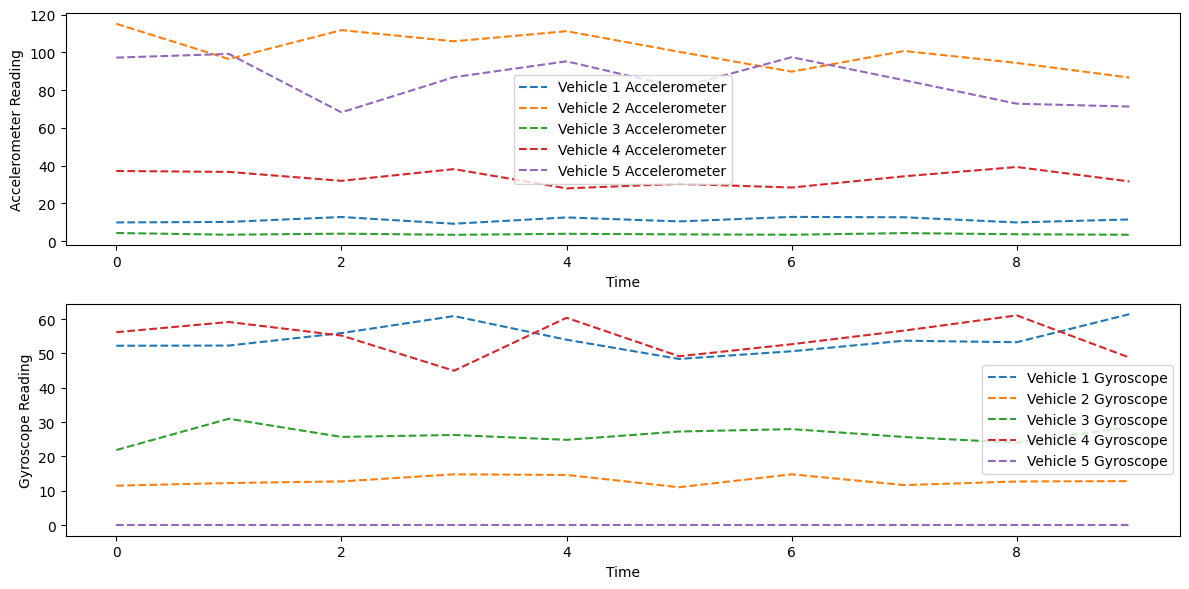

In [8]:
# Visualizations
interactive_map = create_map(tms)
road_condition_heatmap = create_road_condition_heatmap(tms)
vehicle_density_map = create_vehicle_density_map(tms)
vehicle_trajectory_map = create_vehicle_trajectory_map(tms)
accident_hotspot_map = create_accident_hotspot_map(tms)
create_sensor_data_visualization(tms)

interactive_map.save("interactive_map.html")
road_condition_heatmap.save("road_condition_heatmap.html")
vehicle_density_map.save("vehicle_density_map.html")
vehicle_trajectory_map.save("vehicle_trajectory_map.html")
accident_hotspot_map.save("accident_hotspot_map.html")